In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules import LoadData
from modules import ShowImage

%matplotlib inline 

lars
[[5 2 3 4]
 [9 7 8 6]]
[[1 2 3 0]]
[1 2 3 0]
[9 7 8 6]
[7 8 6 9]


In [2]:
# LoadData.MNIST() Data is cleaned to proper format

In [2]:
df_train = pd.read_csv('MNIST_df_train.csv')
df_test = pd.read_csv('MNIST_df_test.csv')

In [31]:
df_train.labs = df_train.labs.astype('int64')
df_test.labs = df_test.labs.astype('int64')

df_train.dtypes

f0      float64
f1      float64
f2      float64
f3      float64
f4      float64
f5      float64
f6      float64
f7      float64
f8      float64
f9      float64
f10     float64
f11     float64
f12     float64
f13     float64
f14     float64
f15     float64
f16     float64
f17     float64
f18     float64
f19     float64
f20     float64
f21     float64
f22     float64
f23     float64
f24     float64
f25     float64
f26     float64
f27     float64
f28     float64
f29     float64
         ...   
f755    float64
f756    float64
f757    float64
f758    float64
f759    float64
f760    float64
f761    float64
f762    float64
f763    float64
f764    float64
f765    float64
f766    float64
f767    float64
f768    float64
f769    float64
f770    float64
f771    float64
f772    float64
f773    float64
f774    float64
f775    float64
f776    float64
f777    float64
f778    float64
f779    float64
f780    float64
f781    float64
f782    float64
f783    float64
labs      int64
dtype: object

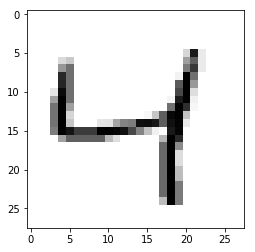

In [52]:
ShowImage(df_train, 2)

In [ ]:
ShowImage(df_test, 3)

In [128]:
def DevelopData(df_input): 
    df = df_input.loc[(df_input['labs']==0)|(df_input['labs']==1)]
    df = df.iloc[0:100]
    return df

In [135]:
df = DevelopData(df_train)
df_test = DevelopData(df_test)

In [113]:
def label_split(df):
    """ Splits MNIST into X and Y
    
    Parameters
    ==========
    pandas dataframe
    
    Returns
    =======
    x, y : numpy array where x = features, y = labels"""
    
    x = np.array(df.drop('labs',axis=1))
    y = np.array(df['labs'])
    return x, y

In [130]:
x, y = label_split(df)

In [149]:
def kNearestClassifier(x,y,value_to_predict,k=1):
    
    ones = np.ones(x.shape[0])
    data = np.array(x)
    
    subtractor = np.outer(ones,value_to_predict)

    matrix = data - subtractor

    dist_before_sq = np.diag(np.inner(matrix,matrix)) # distance before squareing
    dist = np.sqrt(dist_before_sq) # all distances

    sorter = np.argsort(dist)

    sorted_y = y[sorter] # labels sorted according to distance
    counts = np.bincount(sorted_y[:k-1])
    return np.argmax(counts)

In [152]:
df_test.drop('prediction',axis=1, inplace=True)
df_test['prediction'] = df_test.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_test.columns if i != 'labs' ], k=5),axis=1)


In [153]:
df_test

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f776,f777,f778,f779,f780,f781,f782,f783,labs,prediction
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
